In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from sklearn.preprocessing import StandardScaler

In [2]:
a = pd.read_csv("process_4_coverage_x_scale.csv")
b = pd.read_csv("process_4_lengthn_1000.csv")
c = pd.read_csv("process_4_x_scale_averages.csv")

In [8]:
print(c.to_latex(index=False)) 

\begin{tabular}{lrr}
\toprule
                       method &  mean\_interval\_length &  mean\_coverage \\
\midrule
          pred\_band\_cdf\_based &              3.711510 &       0.896788 \\
         pred\_band\_mean\_based &              2.670595 &       0.898848 \\
  pred\_band\_quantile\_based\_rf &              2.608335 &       0.898182 \\
pred\_band\_weighted\_mean\_based &              2.734375 &       0.900727 \\
\bottomrule
\end{tabular}



In [5]:
X = generate_X_fixed_positions(n=2000, p=100, X_dist="uniform", cor="none", standardize=False, uniform_upper=1)
y, eps, sigma_vec, mu, beta = generate_y_fixed_positions_beta(X_mat=X, eps_dist="normal", error_type="varying_squared_linear_part", 
                                                              functional_form="sine", non_zero_beta_count=5)

X_predict, X_split_again, y_predict, y_split_again = train_test_split(X, y, train_size=150)
X_train, X_conf, y_train, y_conf = train_test_split(X_split_again, y_split_again, test_size = 0.5, train_size =0.5)

linear_part = X_predict @ beta

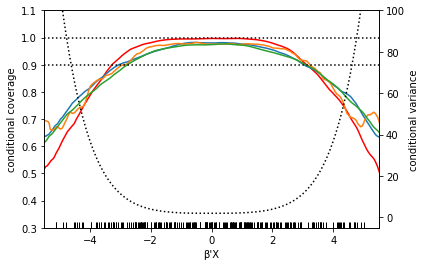

In [28]:

fig,ax = plt.subplots()

# make a plot
ax.plot(a1["cond_variance_y_grid"], a1["mean_based_cond_coverage"], 'r', label='mean_based')
ax.plot(a1["cond_variance_y_grid"], a1["w_mean_based_cond_coverage"], label='w_mean_based')
ax.plot(a1["cond_variance_y_grid"], a1["quantile_based_cond_coverage"], label='quantile_based')
ax.plot(a1["cond_variance_y_grid"], a1["cdf_based_cond_coverage"], label='cdf_based')


ax.axhline(y=0.9, color='black', linestyle=':')
ax.axhline(y=1.0, color='black', linestyle=':')

# set x-axis label
ax.set_xlabel("β'X")
ax.set_xlim([-5.5, 5.5])
ax.set_ylim([0.3, 1.1])
# set y-axis label
ax.set_ylabel("conditional coverage",color="black")
#ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
x_grid, cond_var = get_conditional_variances(process_type=1)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2.plot(x_grid, cond_var,':', color="black")

ax2.set_ylabel("conditional variance",color="black")
ax2.set_xlim([-5.5, 5.5])
ax2.set_ylim([-5, 100])

sample = linear_part
ax.plot(sample, [0.31]*len(sample), '|', color='k')

plt.show()

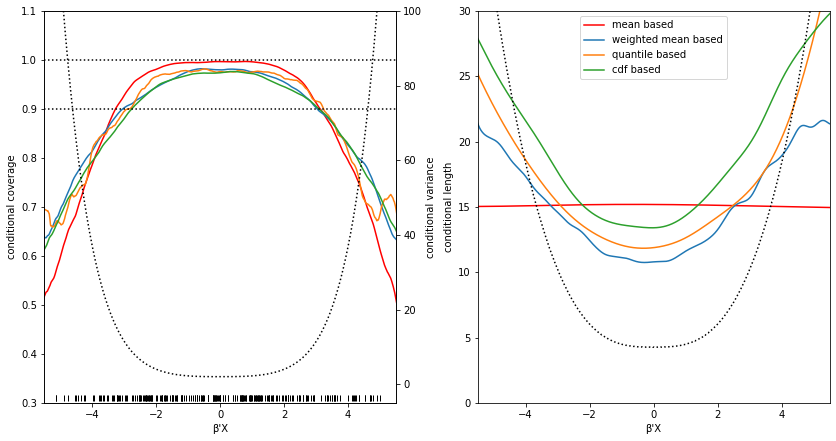

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11.5,6), constrained_layout=True)


#fig.suptitle('Lei et al. (2018), Setting C inspired, n = 1000, p=10')

ax1.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax1.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax1.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax1.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


ax1.axhline(y=0.9, color='black', linestyle=':')
ax1.axhline(y=1.0, color='black', linestyle=':')

sample = linear_part
ax1.plot(sample, [0.31]*len(sample), '|', color='k')

# set x-axis label
ax1.set_xlabel("β'X")
ax1.set_xlim([-5.5, 5.5])
ax1.set_ylim([0.3, 1.1])
# set y-axis label
ax1.set_ylabel("conditional coverage",color="black")
#ax.legend()

# twin object for two different y-axis on the sample plot
ax1_1=ax1.twinx()
x_grid, cond_var = get_conditional_variances(process_type=1)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax1_1.plot(x_grid, cond_var,':', color="black")

ax1_1.set_ylabel("conditional variance",color="black")
ax1_1.set_xlim([-5.5, 5.5])
ax1_1.set_ylim([-5, 100])
##################################


ax2.plot(b["cond_variance_y_grid"], b["mean_based_cond_length"], 'r', label='mean based')
ax2.plot(b["cond_variance_y_grid"], b["w_mean_based_cond_length"], label='weighted mean based')
ax2.plot(b["cond_variance_y_grid"], b["quantile_based_cond_length"], label='quantile based')
ax2.plot(b["cond_variance_y_grid"], b["cdf_based_cond_length"], label='cdf based')


# set x-axis label
ax2.set_xlabel("β'X")
#ax.set_ylim([1, 5])
# set y-axis label
ax2.set_ylabel("conditional length",color="black")
#ax.set_xlim([0.0, 1])
ax2.legend()
ax2.set_ylim([0, 30])
ax2.set_xlim([-5.5, 5.5])
# twin object for two different y-axis on the sample plot
#ax2_2=ax2.twinx()

df_length = np.array(pd.read_csv("lei_third_moment_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax2.plot(x_ax, oracle_length, ':', color="black")
#ax2_2.set_ylim([0, 30])
#ax2_2.set_xlim([-5.5, 5.5])
#ax2_2.set_ylabel("oracle band conditional length",color="black")


plt.savefig('figure.pdf')

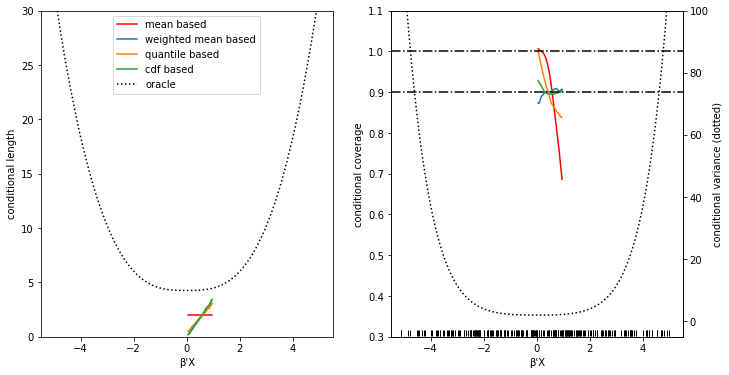

In [34]:
# do NOT DELETE, reserved scaling for process 1:

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11.5,6), constrained_layout=False)


#fig.suptitle('Lei et al. (2018), Setting C inspired, n = 1000, p=10')

ax2.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax2.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax2.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax2.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


ax2.axhline(y=0.9, color='black', linestyle='-.')
ax2.axhline(y=1.0, color='black', linestyle='-.')

sample = linear_part
ax2.plot(sample, [0.31]*len(sample), '|', color='k')

# set x-axis label
ax2.set_xlabel("β'X")
ax2.set_xlim([-5.5, 5.5])
ax2.set_ylim([0.3, 1.1])
# set y-axis label
ax2.set_ylabel("conditional coverage",color="black")
#ax1.legend()

# twin object for two different y-axis on the sample plot
ax2_2=ax2.twinx()
x_grid, cond_var = get_conditional_variances(process_type=1)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2_2.plot(x_grid, cond_var,':', color="black")

ax2_2.set_ylabel("conditional variance (dotted)",color="black")
ax2_2.set_xlim([-5.5, 5.5])
ax2_2.set_ylim([-5, 100])
##################################


ax1.plot(b["cond_variance_y_grid"], b["mean_based_cond_length"], 'r', label='mean based')
ax1.plot(b["cond_variance_y_grid"], b["w_mean_based_cond_length"], label='weighted mean based')
ax1.plot(b["cond_variance_y_grid"], b["quantile_based_cond_length"], label='quantile based')
ax1.plot(b["cond_variance_y_grid"], b["cdf_based_cond_length"], label='cdf based')


# set x-axis label
ax1.set_xlabel("β'X")
#ax.set_ylim([1, 5])
# set y-axis label
ax1.set_ylabel("conditional length",color="black")
#ax.set_xlim([0.0, 1])
ax1.set_ylim([0, 30])
ax1.set_xlim([-5.5, 5.5])
# twin object for two different y-axis on the sample plot
#ax2_2=ax2.twinx()

df_length = np.array(pd.read_csv("lei_third_moment_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax1.plot(x_ax, oracle_length, ':', color="black", label='oracle')
ax1.legend()
#ax2_2.set_ylim([0, 30])
#ax2_2.set_xlim([-5.5, 5.5])
#ax2_2.set_ylabel("oracle band conditional length",color="black")


plt.savefig('figure.pdf')

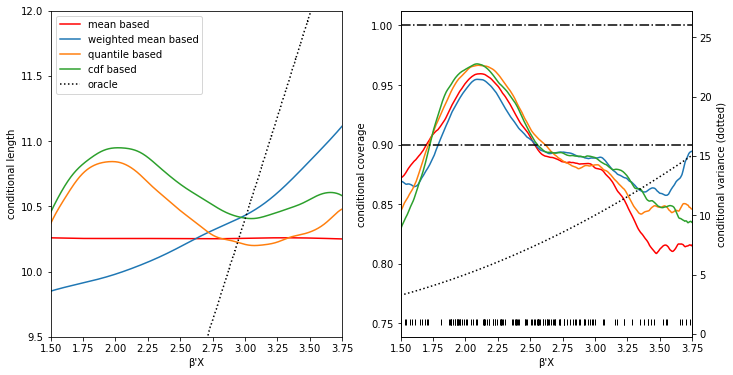

In [6]:
# do NOT DELETE, reserved scaling for process 2:


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11.5,6), constrained_layout=False)


#fig.suptitle('Lei et al. (2018), Setting C inspired, n = 1000, p=10')

ax2.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax2.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax2.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax2.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


ax2.axhline(y=0.9, color='black', linestyle='-.')
ax2.axhline(y=1.0, color='black', linestyle='-.')

sample = linear_part
#ax2.plot(sample, [0.31]*len(sample), '|', color='k')

# set x-axis label
ax2.set_xlabel("β'X")
ax2.set_xlim([1.5, 3.75])
#ax2.set_ylim([0.3, 1.1])
# set y-axis label
ax2.set_ylabel("conditional coverage",color="black")
#ax1.legend()

# twin object for two different y-axis on the sample plot
ax2_2=ax2.twinx()
x_grid, cond_var = get_conditional_variances(process_type=2)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2_2.plot(x_grid, cond_var,':', color="black")

ax2_2.set_ylabel("conditional variance (dotted)",color="black")
#ax2_2.set_xlim([0, 5])
#ax2_2.set_ylim([-5, 100])
##################################


ax1.plot(b["cond_variance_y_grid"], b["mean_based_cond_length"], 'r', label='mean based')
ax1.plot(b["cond_variance_y_grid"], b["w_mean_based_cond_length"], label='weighted mean based')
ax1.plot(b["cond_variance_y_grid"], b["quantile_based_cond_length"], label='quantile based')
ax1.plot(b["cond_variance_y_grid"], b["cdf_based_cond_length"], label='cdf based')


# set x-axis label
ax1.set_xlabel("β'X")
#ax.set_ylim([1, 5])
# set y-axis label
ax1.set_ylabel("conditional length",color="black")
#ax.set_xlim([0.0, 1])
ax1.set_ylim([9.5, 12])
ax1.set_xlim([1.5, 3.75])
# twin object for two different y-axis on the sample plot
#ax1_1=ax1.twinx()

df_length = np.array(pd.read_csv("candes_sine_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax1.plot(x_ax, oracle_length, ':', color="black", label='oracle')
#ax1_1.set_ylabel("oracle length",color="black")
ax1.legend()
#ax2_2.set_ylim([0, 30])
#ax2_2.set_xlim([-5.5, 5.5])
#ax2_2.set_ylabel("oracle band conditional length",color="black")
sample = linear_part
ax2.plot(sample, [0.751]*len(sample), '|', color='k')


plt.savefig('figure.pdf')

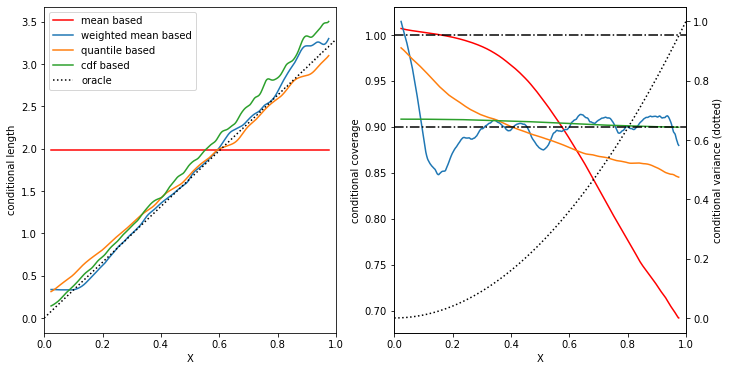

In [17]:
# do NOT DELETE, reserved scaling for process 3:


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11.5,6), constrained_layout=False)


#fig.suptitle('Lei et al. (2018), Setting C inspired, n = 1000, p=10')

ax2.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax2.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax2.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax2.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


ax2.axhline(y=0.9, color='black', linestyle='-.')
ax2.axhline(y=1.0, color='black', linestyle='-.')

#sample = linear_part
#ax2.plot(sample, [0.31]*len(sample), '|', color='k')

# set x-axis label
ax2.set_xlabel("X")
ax2.set_xlim([0, 1])
#ax2.set_ylim([0.3, 1.1])
# set y-axis label
ax2.set_ylabel("conditional coverage",color="black")
#ax1.legend()

# twin object for two different y-axis on the sample plot
ax2_2=ax2.twinx()
x_grid, cond_var = get_conditional_variances(process_type=3)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2_2.plot(x_grid, cond_var,':', color="black")

ax2_2.set_ylabel("conditional variance (dotted)",color="black")
#ax2_2.set_xlim([0, 5])
#ax2_2.set_ylim([-5, 100])
##################################


ax1.plot(b["cond_variance_y_grid"], b["mean_based_cond_length"], 'r', label='mean based')
ax1.plot(b["cond_variance_y_grid"], b["w_mean_based_cond_length"], label='weighted mean based')
ax1.plot(b["cond_variance_y_grid"], b["quantile_based_cond_length"], label='quantile based')
ax1.plot(b["cond_variance_y_grid"], b["cdf_based_cond_length"], label='cdf based')


# set x-axis label
ax1.set_xlabel("X")
#ax.set_ylim([1, 5])
# set y-axis label
ax1.set_ylabel("conditional length",color="black")
#ax.set_xlim([0.0, 1])
#ax1.set_ylim([9.5, 12])  #############
ax1.set_xlim([0, 1])
# twin object for two different y-axis on the sample plot
#ax1_1=ax1.twinx()

df_length = np.array(pd.read_csv("chernozhukov_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax1.plot(x_ax, oracle_length, ':', color="black", label='oracle')
#ax1_1.set_ylabel("oracle length",color="black")
ax1.legend()
#ax2_2.set_ylim([0, 30])
#ax2_2.set_xlim([-5.5, 5.5])
#ax2_2.set_ylabel("oracle band conditional length",color="black")
#sample = linear_part
#ax2.plot(sample, [0.751]*len(sample), '|', color='k')


plt.savefig('figure.pdf')

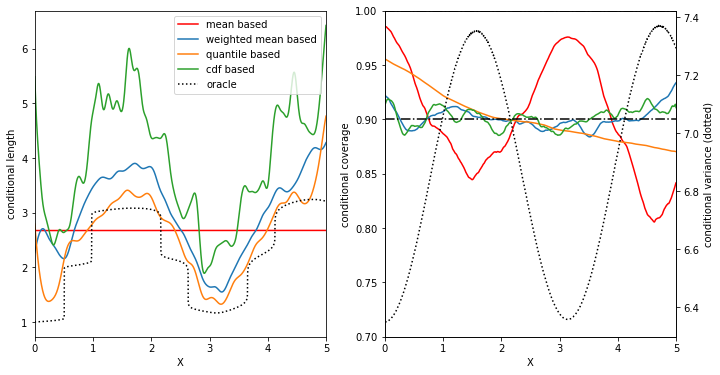

In [5]:
# do NOT DELETE, reserved scaling for process 4:


fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(11.5,6), constrained_layout=False)


#fig.suptitle('Lei et al. (2018), Setting C inspired, n = 1000, p=10')

ax2.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax2.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax2.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax2.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


ax2.axhline(y=0.9, color='black', linestyle='-.')
ax2.axhline(y=1.0, color='black', linestyle='-.')

#sample = linear_part
#ax2.plot(sample, [0.31]*len(sample), '|', color='k')

# set x-axis label
ax2.set_xlabel("X")
ax2.set_xlim([0, 5])
ax2.set_ylim([0.7, 1.0])
# set y-axis label
ax2.set_ylabel("conditional coverage",color="black")
#ax1.legend()

# twin object for two different y-axis on the sample plot
ax2_2=ax2.twinx()
x_grid, cond_var = get_conditional_variances(process_type=4)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2_2.plot(x_grid, cond_var,':', color="black")

ax2_2.set_ylabel("conditional variance (dotted)",color="black")
#ax2_2.set_xlim([0, 5])
#ax2_2.set_ylim([-5, 100])
##################################


ax1.plot(b["cond_variance_y_grid"], b["mean_based_cond_length"], 'r', label='mean based')
ax1.plot(b["cond_variance_y_grid"], b["w_mean_based_cond_length"], label='weighted mean based')
ax1.plot(b["cond_variance_y_grid"], b["quantile_based_cond_length"], label='quantile based')
ax1.plot(b["cond_variance_y_grid"], b["cdf_based_cond_length"], label='cdf based')


# set x-axis label
ax1.set_xlabel("X")
#ax.set_ylim([1, 5])
# set y-axis label
ax1.set_ylabel("conditional length",color="black")
#ax.set_xlim([0.0, 1])
#ax1.set_ylim([9.5, 12])  #############
ax1.set_xlim([0, 5])
# twin object for two different y-axis on the sample plot
#ax1_1=ax1.twinx()

df_length = np.array(pd.read_csv("romano_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax1.plot(x_ax, oracle_length, ':', color="black", label='oracle')
#ax1_1.set_ylabel("oracle length",color="black")
ax1.legend()
#ax2_2.set_ylim([0, 30])
#ax2_2.set_xlim([-5.5, 5.5])
#ax2_2.set_ylabel("oracle band conditional length",color="black")
#sample = linear_part
#ax2.plot(sample, [0.751]*len(sample), '|', color='k')


plt.savefig('figure_new.pdf')

In [99]:
n = 100000
X = np.zeros((n,5))
X[:,0] = np.random.normal(0, 1, n)
X[:,1] = np.random.binomial(n=1, p=0.5, size=n)
X[:,2] = skewnorm.rvs(5, size=n)
X[:,3] = skewnorm.rvs(5, size=n)
X[:,4] = np.random.binomial(n=1, p=0.5, size=n)

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_beta = X.sum(axis=1)

(array([2.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 5.000e+00,
        1.300e+01, 1.500e+01, 2.200e+01, 3.000e+01, 2.700e+01, 3.400e+01,
        4.500e+01, 5.600e+01, 7.200e+01, 7.300e+01, 1.100e+02, 1.280e+02,
        1.170e+02, 1.610e+02, 1.950e+02, 2.200e+02, 2.680e+02, 2.770e+02,
        3.170e+02, 3.790e+02, 4.380e+02, 4.300e+02, 5.100e+02, 5.910e+02,
        5.970e+02, 6.990e+02, 7.840e+02, 8.830e+02, 9.850e+02, 9.850e+02,
        1.017e+03, 1.131e+03, 1.276e+03, 1.230e+03, 1.360e+03, 1.512e+03,
        1.549e+03, 1.674e+03, 1.717e+03, 1.696e+03, 1.924e+03, 1.886e+03,
        1.905e+03, 2.028e+03, 2.056e+03, 2.113e+03, 2.172e+03, 2.244e+03,
        2.316e+03, 2.233e+03, 2.241e+03, 2.349e+03, 2.370e+03, 2.317e+03,
        2.336e+03, 2.287e+03, 2.171e+03, 2.217e+03, 2.222e+03, 2.110e+03,
        2.111e+03, 2.058e+03, 1.854e+03, 1.909e+03, 1.851e+03, 1.789e+03,
        1.700e+03, 1.645e+03, 1.558e+03, 1.417e+03, 1.343e+03, 1.288e+03,
        1.208e+03, 1.080e+03, 1.075e+0

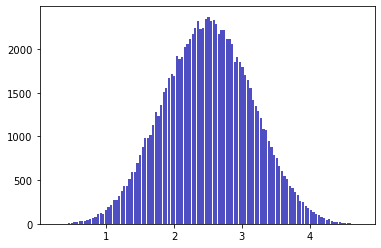

In [102]:
# An "interface" to matplotlib.axes.Axes.hist() method
plt.hist(x=X_beta, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [3]:
def get_conditional_variances(process_type):
    if process_type == 3: # chernozhukov example distributional conformal prediction (2021)
        x_grid = np.linspace(0,1,2000)
        return x_grid, np.array(x_grid)**2
    if process_type == 4: # romano table
        df = pd.read_csv("romano_table_cond_variances.csv")
        return np.array(df["X"]), np.array(df["cond_var"])
    if process_type == 2:
        x_grid= np.linspace(0,5,2000)
        cond_var = 1 + x_grid**2
        return x_grid, cond_var
    if process_type == 1:
        x_grid= np.linspace(-5,5,2000)
        cond_var = 2 * (1 + (2 * np.abs(x_grid)**3) / 38.73 )**2
        return x_grid, cond_var

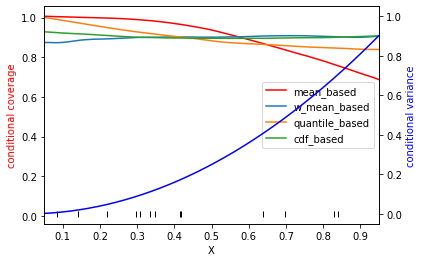

In [14]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot
ax.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'r', label='mean_based')
ax.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
ax.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
ax.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')

# set x-axis label
ax.set_xlabel("X")
#ax.set_xlim([0, 5])
# set y-axis label
ax.set_ylabel("conditional coverage",color="red")
ax.legend()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
x_grid, cond_var = get_conditional_variances(process_type=3)

#sample = np.hstack((np.random.randn(50), np.random.randn(20)+5))
#ax.plot(sample, [0.01]*len(sample), '|', color='k')

# make a plot with different y-axis using second axis object
ax2.plot(x_grid, cond_var,color="blue",label='quantile_based')

ax2.set_ylabel("conditional variance",color="blue")
ax2.set_xlim([0.05, 0.95])

plt.show()



#fig = plt.figure()
#ax = plt.subplot(111)

#fig.suptitle('n=100, p=10, Lei et al. (2017), Setting C')
#plt.xlabel('cond_variance_y')
#plt.ylabel('cond_coverage')

#plt.plot(a["cond_variance_y_grid"], a["mean_based_cond_coverage"], 'b', label='mean_based')
#plt.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_coverage"], label='w_mean_based')
#plt.plot(a["cond_variance_y_grid"], a["quantile_based_cond_coverage"], label='quantile_based')
#plt.plot(a["cond_variance_y_grid"], a["cdf_based_cond_coverage"], label='cdf_based')


#ax.legend()
#plt.show()

In [191]:
df_length = pd.read_csv("chernozhukov_table_oracle_lengths.csv")

In [196]:
df_length

,0,1
0,0.000000,0.000000
1,0.000500,0.001646
2,0.001001,0.003291
3,0.001501,0.004937
4,0.002001,0.006583
...,...,...
1995,0.997999,3.282019
1996,0.998499,3.284199
1997,0.998999,3.287415
1998,0.999500,3.287001


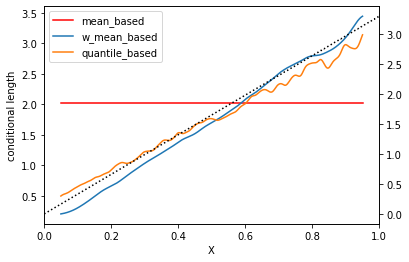

In [9]:
fig,ax = plt.subplots()

# make a plot
ax.plot(a["cond_variance_y_grid"], a["mean_based_cond_length"], 'r', label='mean_based')
ax.plot(a["cond_variance_y_grid"], a["w_mean_based_cond_length"], label='w_mean_based')
ax.plot(a["cond_variance_y_grid"], a["quantile_based_cond_length"], label='quantile_based')
#ax.plot(a["cond_variance_y_grid"], a["cdf_based_cond_length"], label='cdf_based')


# set x-axis label
ax.set_xlabel("X")
#ax.set_ylim([1, 5])
# set y-axis label
ax.set_ylabel("conditional length",color="black")
ax.set_xlim([0.0, 1])
ax.legend()
#ax.set_ylim([0, 40])
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

df_length = np.array(pd.read_csv("chernozhukov_table_oracle_lengths.csv"))
x_ax = df_length[:,0]
oracle_length = df_length[:,1]
ax2.plot(x_ax, oracle_length, ':', color="black")
#ax2.set_ylim([1, 5])
#ax.plot(x_ax, oracle_length, ':', color="black")

#x_grid, cond_var = get_conditional_variances(process_type=1)

# make a plot with different y-axis using second axis object
#ax2.plot(x_grid, cond_var,color="blue",label='quantile_based')

#ax2.set_ylabel("conditional variance",color="black")
#ax2.set_xlim([1.5, 3.6])
plt.show()